In [105]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [106]:
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

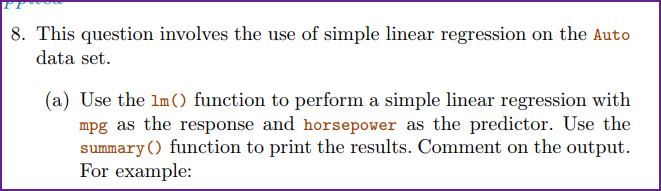

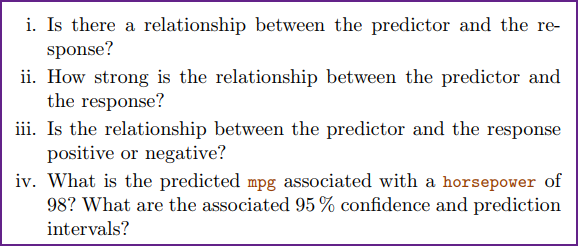

In [107]:
 # A coluna horsepower tinha ? em algumas linhas
auto = pd.read_csv('Data/Auto.csv',na_values=['?'],dtype={'horsepower':np.float64})

In [108]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [109]:
est = smf.ols(formula='mpg ~ horsepower',data=auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           7.03e-81
Time:                        20:32:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# i.
Yes, there is a relationship between horsepower and mpg as deterined by testing the null hypothesis of all regression coefficients equal to zero. Since the F-statistic is far larger than 1 and the p-value of the F-statistic is close to zero we can reject the null hypothesis and state there is a statistically significant relationship between horsepower and mpg.

# ii.
To calculate the residual error relative to the response we use the mean of the response and the RSE. The mean of mpg is 23.4459. The RSE of the lm.fit was 4.906 which indicates a percentage error of 20.9248%. The R2 of the lm.fit was about 0.6059, meaning 60.5948% of the variance in mpg is explained by horsepower.

In [110]:
# RSE
np.sqrt(est.mse_resid)

4.90575691954594

In [111]:
# % do RSE
np.sqrt(est.mse_resid)/np.mean(auto.mpg)*100

20.86147407891919

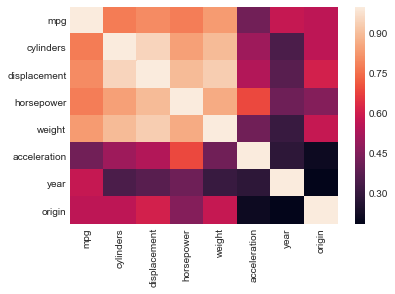

In [112]:
sns.heatmap(abs(auto.corr()))

In [113]:
# Para regressão linear simples, o resultado deve ser igual a correlacao elevada ao quadrado
auto.corr().loc['mpg','horsepower']**2

0.6059482578894334

# iii.
The relationship between mpg and horsepower is negative. The more horsepower an automobile has the linear regression indicates the less mpg fuel efficiency the automobile will have.

# iv. 
What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

In [114]:
est.predict({'horsepower':98})

0    24.467077
dtype: float64

In [115]:
pred = est.get_prediction({'horsepower':98})
pred.conf_int()

array([[23.97307896, 24.96107534]])

In [116]:
#mean_ci_lower - mean_ci_upper - confidence interval
#obs_ci_lower - obs_ci_upper - Predict interval
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


# b)
Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

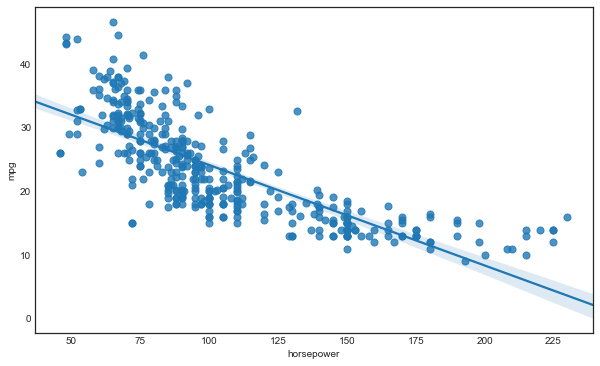

In [117]:
plt.figure(figsize=(10,6))
sns.regplot(x=auto.horsepower,y=auto.mpg,scatter_kws={'s':50})

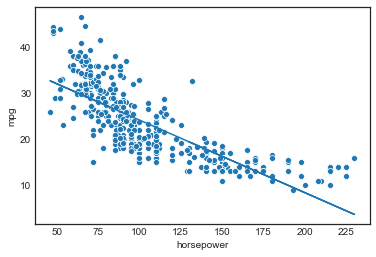

In [118]:
# Let's plot our predicted regression

df = pd.concat([auto['horsepower'], auto['mpg']], axis=1)
ax = sns.scatterplot(x='horsepower', y='mpg', data=df)
ax.plot(auto[auto.horsepower.notnull()].horsepower,est.predict() );

# c)
Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [119]:
auto2 = auto.copy()
auto2 = auto2.dropna(subset=['horsepower'])
auto2 = auto2.reset_index()

X = pd.DataFrame(auto2.horsepower)
y = pd.DataFrame(auto2.mpg)

# generate OLS model
#model = sm.OLS(y, sm.add_constant(X))
#model_fit = model.fit()

# create dataframe from X, y for easier plot handling
#dataframe = pd.concat([X, y], axis=1)

In [120]:
est = smf.ols(formula='mpg ~ horsepower',data=auto).fit()

In [121]:
import diagnostic_plots

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


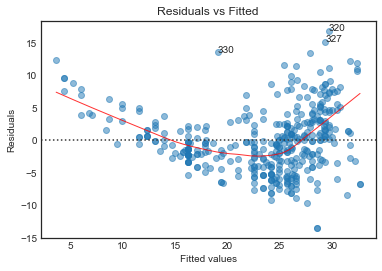

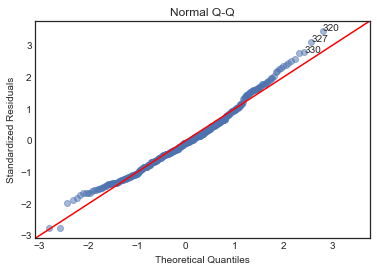

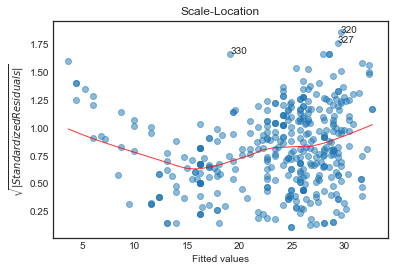

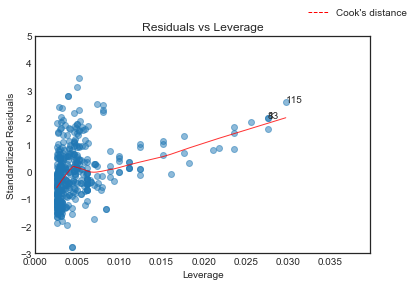

In [122]:
diagnostic_plots.diagnostic_plots(X,y)

In [123]:
est.outlier_test()[abs(est.outlier_test()['student_resid']) > 2]

,student_resid,unadj_p,bonf(p)
116,2.578033,0.010303,1.000000
154,-2.796554,0.005421,1.000000
155,-2.796554,0.005421,1.000000
244,2.209186,0.027744,1.000000
247,2.158044,0.031536,1.000000
309,2.793702,0.005469,1.000000
320,2.379110,0.017836,1.000000
322,3.508709,0.000503,0.197154
324,2.285795,0.022803,1.000000
325,2.459650,0.014342,1.000000


Based on the residuals plots, there is some evidence of non-linearity.


The above residual plot grid shows the relationship between the horsepower predictor and the mpg response. There are several things to note:

- **Non-linearity of the data:** The top-left residual plot exhibits a discernable pattern, in this case u-shaped, that suggests our linear model is not providing a optimal fit to our data - the relationship is non-linear. A discernable pattern in this plot suggests that our model is failing to account for some of the reducible variance in the responses. There is still a discernable pattern in the bottom-left plot suggesting that a quadratic transform only improves the fit of our model slightly.
- **Heteroscedasticity** – Non-constant variance of error terms The top-left residual plot exhibits a conical shape. This suggests that there is some heteroscedasticity in our predictor. The standardised plot (bottom-left) also exhibits this characteristic suggesting that standardisation doesn't alleviate the issue – to address this we might consider fitting our model by weighted least squares.
- **Outliers and leverage:** the bottom-right residual vs leverage plot suggests that there are several potential outliers (points in top-right of axis) that could be having a strong effect (leverage) on our model. We should add more predictors to our model to clarify outliers.
- The top-right plot shows that our studentised residuals have a slightly non-normal distribution (TODO: ellaborate)

# 9.(a) 
Produce a scatterplot matrix which includes all of the variables
in the data set

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


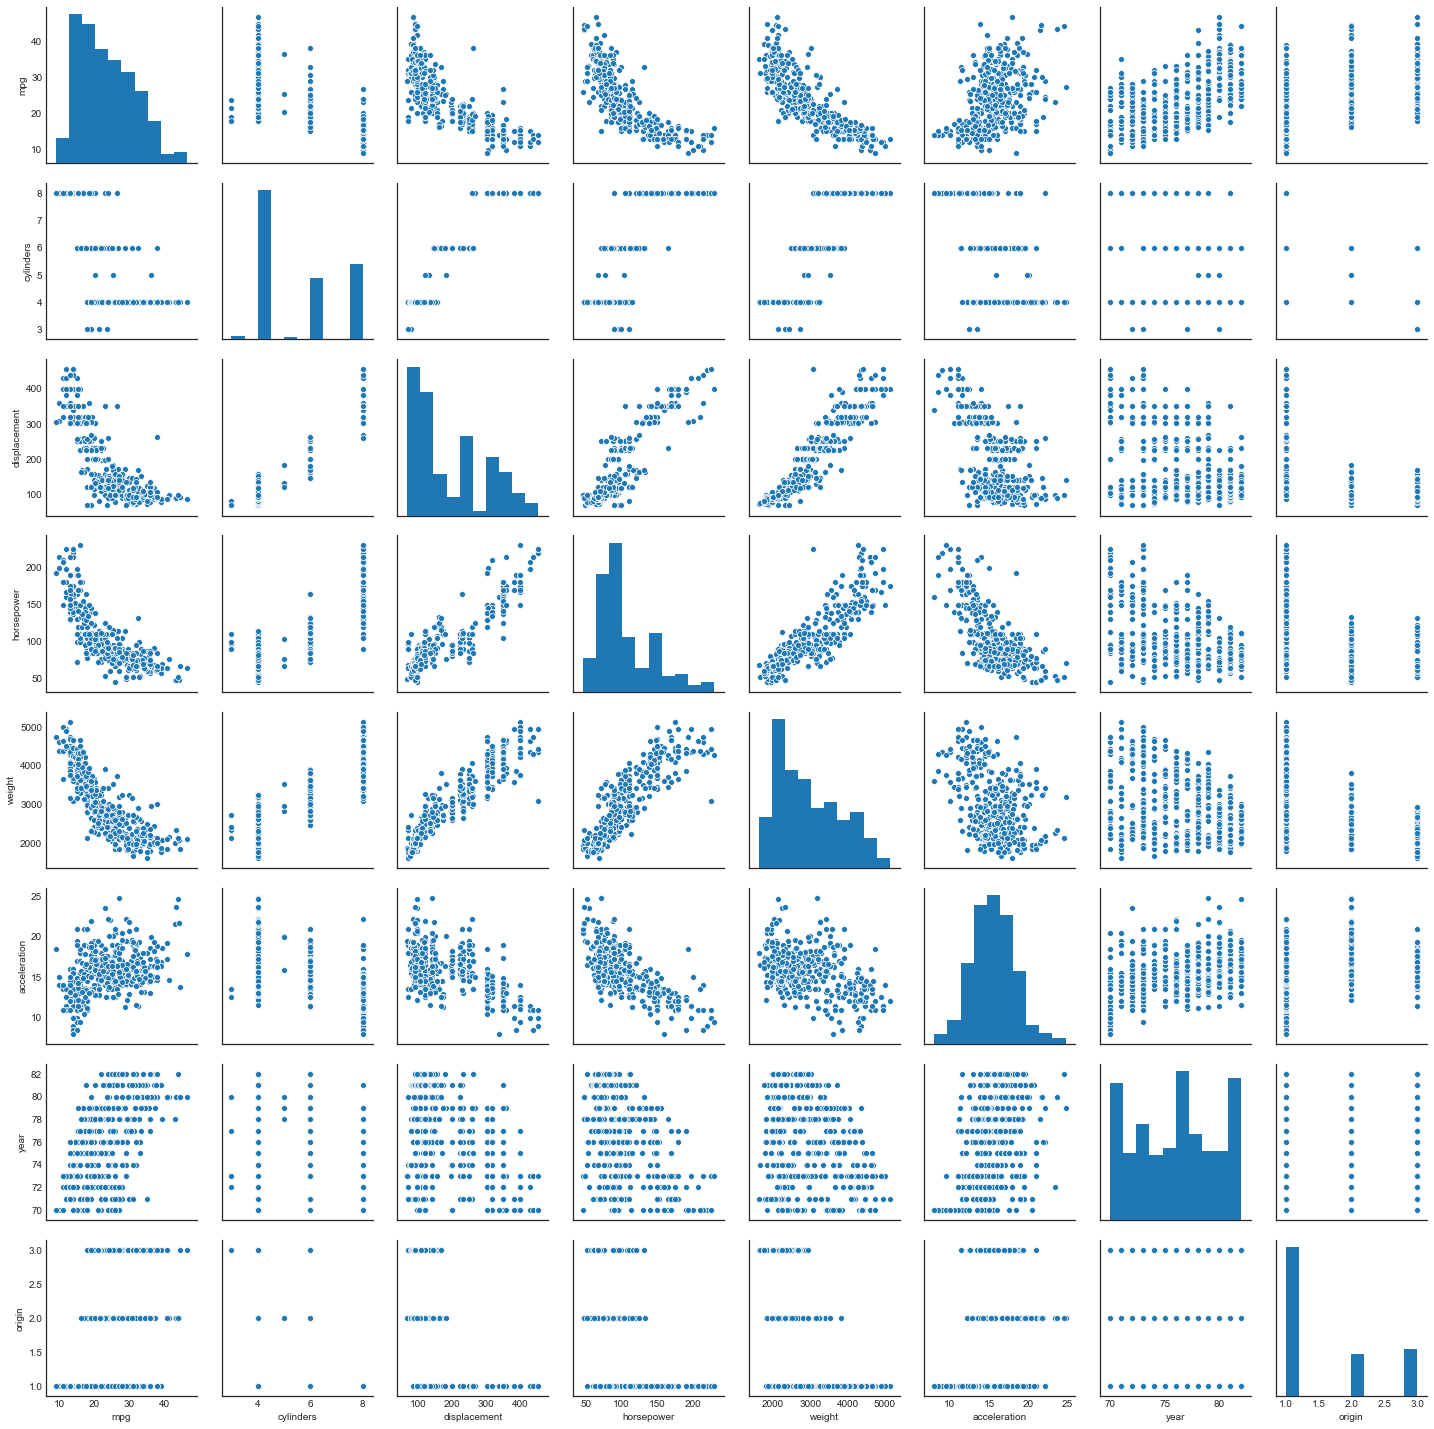

In [124]:
sns.pairplot(auto)

# (b) 
Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable,
cor()
which is qualitative.

In [125]:
auto.corr().abs()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,0.776260,0.804443,0.778427,0.831739,0.422297,0.581469,0.563698
cylinders,0.776260,1.000000,0.950920,0.842983,0.897017,0.504061,0.346717,0.564972
displacement,0.804443,0.950920,1.000000,0.897257,0.933104,0.544162,0.369804,0.610664
horsepower,0.778427,0.842983,0.897257,1.000000,0.864538,0.689196,0.416361,0.455171
weight,0.831739,0.897017,0.933104,0.864538,1.000000,0.419502,0.307900,0.581265
acceleration,0.422297,0.504061,0.544162,0.689196,0.419502,1.000000,0.282901,0.210084
year,0.581469,0.346717,0.369804,0.416361,0.307900,0.282901,1.000000,0.184314
origin,0.563698,0.564972,0.610664,0.455171,0.581265,0.210084,0.184314,1.000000


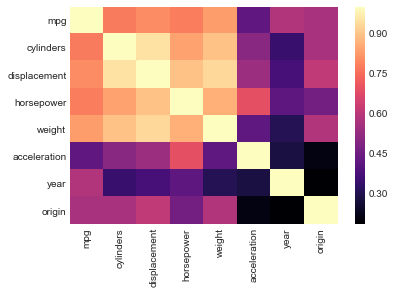

In [126]:
sns.heatmap(auto.corr().abs(),cmap='magma')

# c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:
- i. Is there a relationship between the predictors and the response?
- ii. Which predictors appear to have a statistically significant
relationship to the response?
- iii. What does the coefficient for the year variable suggest?

In [127]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [128]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]
X.insert(0,column='Ones',value=1)
y = auto.mpg

In [129]:
' + '.join(X.columns)

'Ones + cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [130]:
est = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)',data=auto).fit()

In [131]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          1.79e-139
Time:                        20:32:47   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- i. Is there a relationship between the predictors and the response?
**Sim, F-statistic é muito pequena.**

- ii. Which predictors appear to have a statistically significant relationship to the response?

In [132]:
est.pvalues[est.pvalues < 0.05].sort_values()

year              2.332943e-40
weight            6.375633e-22
C(origin)[T.3]    3.933208e-07
C(origin)[T.2]    4.720373e-06
Intercept         1.445124e-04
displacement      1.862685e-03
dtype: float64

- iii. What does the coefficient for the year variable suggest? **Quanto mais novo o carro, mais eficiente é o consumo de combustivel.**

# (d) 
Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

In [133]:
X.dropna(inplace=True)
i = np.array(X.index)
y = y.loc[i]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


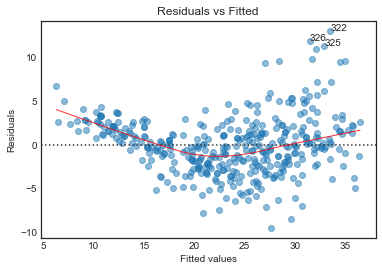

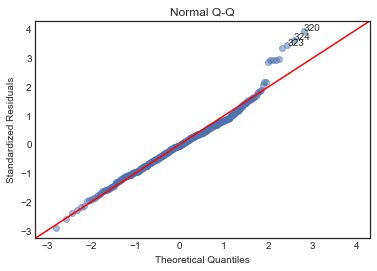

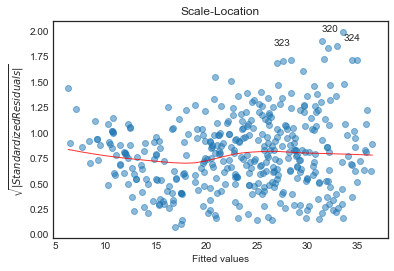

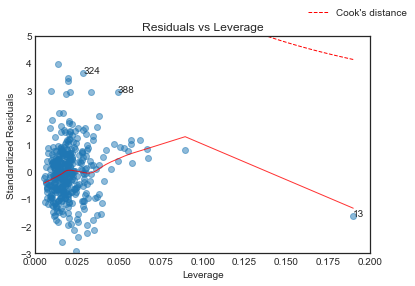

In [134]:
diagnostic_plots.diagnostic_plots(X,y)

- **Linearity:** The u-shaped pattern in the top-left residual plot suggests that there a non-linear relationship that our model is unable to account for. The bottom left Scale-Location plot suggests that a square-root transform reduces the non-linearity of this relationship allowing our model to achieve an improved fit.
- **Heteroscedasticity:** A conical pattern is apparent in the top-left plot suggesting that variance of residuals increases with response. The bottom left plot suggests that a square-root transform helps to mitigate this effect.
- **Outliers:** The top-left plot suggests that there are five potential outliers towards the high end of our predicted responses. The bottom-right plot suggests that these outliers have low leverage, and so probably don't have a overly dispraportionate effect on our model.
- **Leverage:** The bottom right plot reveals one point with particularly high leverage, although with a value around -1.2 this point isn't an outlier in terms of studentised residuals.
- **Normality:** The top-right plot shows a normal distribution except for high value residuals. This suggests that the model under-estimates `mpg` for a larger number of observations than we might expect assuming a normal distribution.


# (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [135]:
auto_df = auto.copy()

In [136]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [137]:


f = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin) \
    + cylinders*displacement \
    + cylinders*horsepower \
    + cylinders*weight \
    + cylinders*acceleration \
    + cylinders*year \
    + displacement*horsepower \
    + displacement*weight \
    + displacement*acceleration \
    + displacement*year \
    + horsepower*weight \
    + horsepower*acceleration \
    + horsepower*year \
    + weight*weight \
    + weight*acceleration \
    + weight*year \
    + acceleration*year \
    '

#y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')
model = smf.ols(formula=f,data=auto).fit()
print(model.mse_resid**(1/2))
model.summary()

2.7413745421223927


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          1.66e-156
Time:                        20:32:48   Log-Likelihood:                -939.16
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     368   BIC:                             2022.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -19.4156     49.770     -0.390      0.697    -117.285      78.454
C(origin)[T.2]                1.4394      0.543      2.652      0.008       0.372       2.507
C(origin)[T.3]                1.2321      0.514      2.397      0.017       0.221       2.243
cylinders                     6.7083      8.230      0.815      0.416      -9.475      22.891
displacement                 -0.3032      0.180     -1.680      0.094      -0.658       0.052
horsepower                    0.3628      0.326      1.112      0.267      -0.279       1.005
weight                        0.0068      0.017      0.392      0.696      -0.028       0.041
acceleration                 -4.6534      2.114     -2.201      0.028      -8.811      -0.496
year                          1.1361      0.584      1.946      0.052      -0.012       2.284
cylinders:displacement       -0.0129      0.005     -2.719      0.007      -0.022      -0.004
cylinders:horsepower          0.0316      0.024      1.338      0.182      -0.015       0.078
cylinders:weight              0.0004      0.001      0.519      0.604      -0.001       0.002
cylinders:acceleration        0.2870      0.167      1.720      0.086      -0.041       0.615
cylinders:year               -0.1699      0.095     -1.793      0.074      -0.356       0.016
displacement:horsepower      -0.0002      0.000     -0.543      0.588      -0.001       0.000
displacement:weight         3.01e-05   1.38e-05      2.186      0.029    3.02e-06    5.72e-05
displacement:acceleration    -0.0063      0.003     -1.970      0.050      -0.013   -1.14e-05
displacement:year             0.0052      0.002      2.345      0.020       0.001       0.010
horsepower:weight         -3.715e-05   2.84e-05     -1.310      0.191   -9.29e-05    1.86e-05
horsepower:acceleration      -0.0040      0.004     -1.112      0.267      -0.011       0.003
horsepower:year              -0.0052      0.004     -1.338      0.182      -0.013       0.002
weight:acceleration           0.0002      0.000      0.731      0.465      -0.000       0.001
weight:year                  -0.0003      0.000     -1.191      0.234      -0.001       0.000
acceleration:year             0.0531      0.025      2.098      0.037       0.003       0.103
==============================================================================
Omnibus:                       35.883   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.345
Skew:                           0.466   Prob(JB):                     4.84e-19
Kurtosis:                       5.073   Cond. No.                     3.46e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

#### Fiz backward elimination pra chegar a essas variaveis

In [138]:
# Let's fit a model with all possible interaction effects

f = 'np.log1p(mpg) ~  displacement + acceleration + C(origin)\
    + cylinders*displacement \
    + displacement*weight \
    + weight*weight \
    + acceleration*year \
    + np.sqrt(horsepower) \
    + acceleration \
    '

#y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')
model = smf.ols(formula=f,data=auto).fit()
print(model.mse_resid**(1/2))
model.summary()

0.1040559326666319


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log1p(mpg)   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          2.01e-182
Time:                        20:32:48   Log-Likelihood:                 336.90
No. Observations:                 392   AIC:                            -649.8
Df Residuals:                     380   BIC:                            -602.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.7525      0.697      8.259      0.000       4.383       7.122
C(origin)[T.2]             0.0426      0.019      2.264      0.024       0.006       0.080
C(origin)[T.3]             0.0314      0.019      1.684      0.093      -0.005       0.068
displacement              -0.0013      0.000     -2.614      0.009      -0.002      -0.000
acceleration              -0.2237      0.043     -5.176      0.000      -0.309      -0.139
cylinders                  0.0178      0.022      0.809      0.419      -0.025       0.061
cylinders:displacement    -0.0001   9.98e-05     -1.085      0.279      -0.000     8.8e-05
weight                    -0.0003   4.09e-05     -8.234      0.000      -0.000      -0.000
displacement:weight     5.961e-07   1.37e-07      4.360      0.000    3.27e-07    8.65e-07
year                      -0.0158      0.009     -1.742      0.082      -0.034       0.002
acceleration:year          0.0029      0.001      5.107      0.000       0.002       0.004
np.sqrt(horsepower)       -0.0450      0.010     -4.318      0.000      -0.065      -0.024
==============================================================================
Omnibus:                        9.730   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               16.762
Skew:                          -0.082   Prob(JB):                     0.000229
Kurtosis:                       4.000   Cond. No.                     1.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
# If we take p < 0.05 as our significance threshold
# which features appear as significant in this model?
model.pvalues[model.pvalues < 0.05].sort_values()

Intercept              2.462936e-15
weight                 2.937605e-15
acceleration           3.679128e-07
acceleration:year      5.193298e-07
displacement:weight    1.676059e-05
np.sqrt(horsepower)    2.013752e-05
displacement           9.307314e-03
C(origin)[T.2]         2.412202e-02
dtype: float64

Only the above features seem to be statistically significant in this model.

Notice the warning (2) that suggests the might be multicollinearity in this model. We can observe in the correlation plot above that there is strong collinearity between mpg, cylinders, displacement, horespower, and weight. This means further investigation is required to discern which, if any, of these features have a *causal* relationship with our response `mpg`.  

#### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your finding

In [140]:
# Let's fit a model with all possible interaction effects

f = 'np.log1p(mpg) ~  displacement + acceleration + C(origin)\
    + cylinders*displacement \
    + displacement*weight \
    + np.power(acceleration,2) \
    + acceleration*year \
    + np.sqrt(horsepower) \
    + acceleration \
    '
#y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')
model = smf.ols(formula=f,data=auto).fit()
print(model.mse_resid**(1/2))
model.summary()

0.10365633854374318


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log1p(mpg)   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     287.7
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          5.16e-182
Time:                        20:32:48   Log-Likelihood:                 338.92
No. Observations:                 392   AIC:                            -651.8
Df Residuals:                     379   BIC:                            -600.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.5627      0.700      7.942      0.000       4.186       6.940
C(origin)[T.2]                0.0351      0.019      1.835      0.067      -0.003       0.073
C(origin)[T.3]                0.0313      0.019      1.689      0.092      -0.005       0.068
displacement                 -0.0013      0.000     -2.558      0.011      -0.002      -0.000
acceleration                 -0.2321      0.043     -5.365      0.000      -0.317      -0.147
cylinders                     0.0267      0.022      1.190      0.235      -0.017       0.071
cylinders:displacement       -0.0001      0.000     -1.460      0.145      -0.000    5.13e-05
weight                       -0.0003   4.09e-05     -8.093      0.000      -0.000      -0.000
displacement:weight        6.218e-07   1.37e-07      4.545      0.000    3.53e-07    8.91e-07
np.power(acceleration, 2)     0.0012      0.001      1.984      0.048    1.06e-05       0.002
year                         -0.0091      0.010     -0.942      0.347      -0.028       0.010
acceleration:year             0.0024      0.001      4.074      0.000       0.001       0.004
np.sqrt(horsepower)          -0.0471      0.010     -4.520      0.000      -0.068      -0.027
==============================================================================
Omnibus:                       11.004   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               19.472
Skew:                          -0.115   Prob(JB):                     5.91e-05
Kurtosis:                       4.067   Cond. No.                     1.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
f = 'mpg ~  displacement + acceleration + C(origin)\
    + cylinders*displacement \
    + displacement*weight \
    + weight*weight \
    + acceleration*year \
    + np.sqrt(horsepower) \
    + acceleration \
    '

y, X = patsy.dmatrices(f, auto, return_type='dataframe')

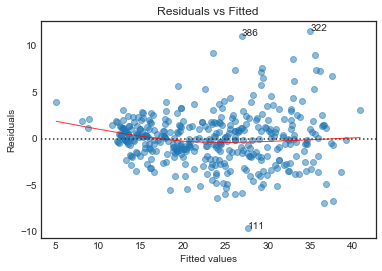

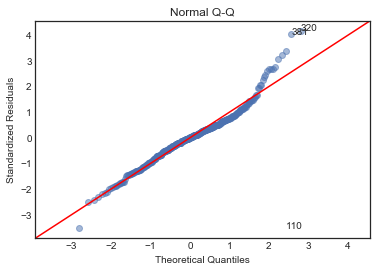

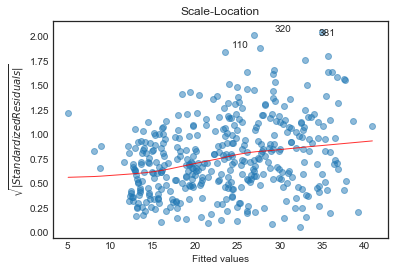

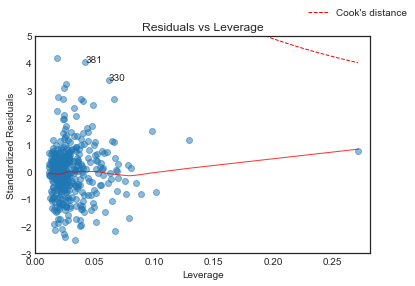

In [142]:
diagnostic_plots.diagnostic_plots(X,y)

#### Vamos adicionar a escala logaritmica no mpg para ver se melhora

In [143]:
auto_df = auto.copy()
auto_df['mpg'] = np.log(auto_df['mpg'])
f = 'mpg ~  displacement + acceleration + C(origin)\
    + cylinders*displacement \
    + displacement*weight \
    + weight*weight \
    + acceleration*year \
    + np.sqrt(horsepower) \
    + acceleration \
    '

y, X = patsy.dmatrices(f, auto, return_type='dataframe')
model = smf.ols(formula=f,data=auto).fit()
print(model.mse_resid**(1/2))
model.summary()

2.803313203948837


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     241.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          9.16e-164
Time:                        20:32:49   Log-Likelihood:                -954.20
No. Observations:                 392   AIC:                             1932.
Df Residuals:                     380   BIC:                             1980.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                111.7604     18.764      5.956      0.000      74.866     148.655
C(origin)[T.2]             1.1313      0.506      2.234      0.026       0.136       2.127
C(origin)[T.3]             0.9575      0.502      1.908      0.057      -0.029       1.944
displacement              -0.0625      0.013     -4.718      0.000      -0.089      -0.036
acceleration              -7.1882      1.165     -6.172      0.000      -9.478      -4.898
cylinders                  1.0094      0.594      1.700      0.090      -0.158       2.177
cylinders:displacement    -0.0033      0.003     -1.215      0.225      -0.009       0.002
weight                    -0.0104      0.001     -9.419      0.000      -0.013      -0.008
displacement:weight      2.45e-05   3.68e-06      6.653      0.000    1.73e-05    3.17e-05
year                      -0.6884      0.244     -2.826      0.005      -1.167      -0.210
acceleration:year          0.0937      0.015      6.182      0.000       0.064       0.123
np.sqrt(horsepower)       -1.0146      0.280     -3.617      0.000      -1.566      -0.463
==============================================================================
Omnibus:                       37.786   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.214
Skew:                           0.506   Prob(JB):                     3.13e-19
Kurtosis:                       5.047   Cond. No.                     1.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

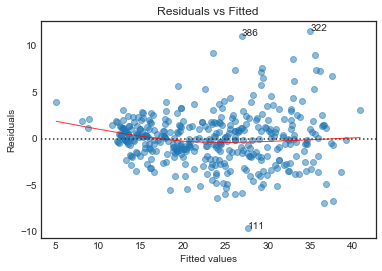

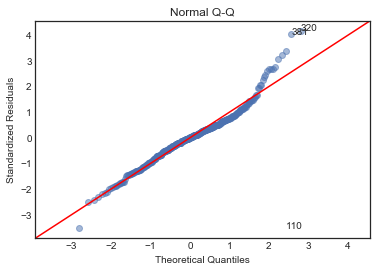

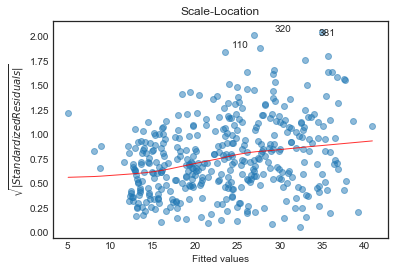

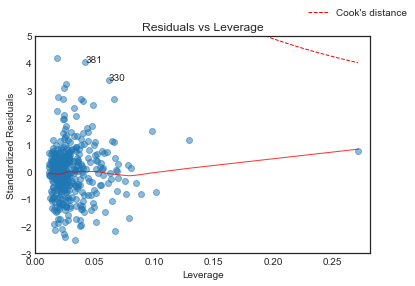

In [144]:
diagnostic_plots.diagnostic_plots(X,y)

### 10. This question should be answered using the Carseats data set.
#### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [145]:
# Load data
carseats = pd.read_csv('./data/Carseats.csv').drop('Unnamed: 0', axis=1)

# No missing values found

# Pre-processing
# Convert quantitive datatypes to numerics
datatypes = {'quant': ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'],
             'qual': ['ShelveLoc', 'Urban', 'US']}
# Use floats for all quantitive values
quants = carseats[datatypes['quant']].astype(np.float_)
carseats_df = pd.concat([quants, carseats[datatypes['qual']]], axis=1)

carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,Bad,Yes,Yes
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,Good,Yes,Yes
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,Medium,Yes,Yes
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,Medium,Yes,Yes
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,Bad,Yes,No


In [146]:
' + '.join(carseats_df.columns)

'Sales + CompPrice + Income + Advertising + Population + Price + Age + Education + ShelveLoc + Urban + US'

In [147]:

f = 'Sales ~  Price + Urban + US'

#y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')
model = smf.ols(formula=f,data=carseats_df).fit()
print(model.mse_resid**(1/2))
model.summary()

2.4724924402701642


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.39e-23
Time:                        20:32:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!


Our model suggests that:

- Sales decrease with increase in Price. For each unit increase in Price, Sales decrease by 0.0545 * 1000 = 54.5 dollars on average.
- There seems to be a statistically significant relationship between Sales and whether the store is in the U.S. or not. We expect carseats sold in the US to achieve a salprice 1,200 dollars higher on average.
- There does not seem to be significant relationship between Sales and wheter the store is in an urban or rural relationship

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

^y = 13.04  -.02xUrban + 1200xUS -0.05xPrice

### (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

#### US e Price

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [148]:
f = 'Sales ~  Price + US'

y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')
model = smf.ols(formula=f,data=carseats_df).fit()
print(model.mse_resid**(1/2))
model.summary()

2.469396800574444


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.66e-24
Time:                        20:32:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (f) How well do the models in (a) and (e) fit the data?

In [149]:
np.sqrt(model.mse_resid)/carseats_df.Sales.mean()*100

32.94143197599416

##### O R² é pequeno em ambos e indica que o modelo só explica 24% da variancia. O erro médio é de 33%, que é grande. Entretanto as variaveis são bastante significantes.

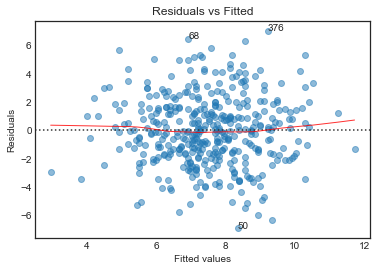

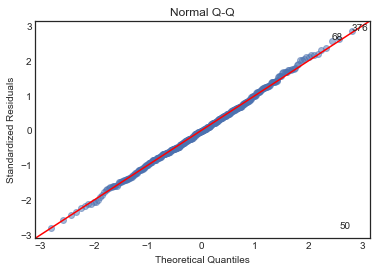

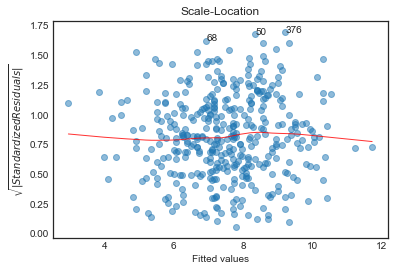

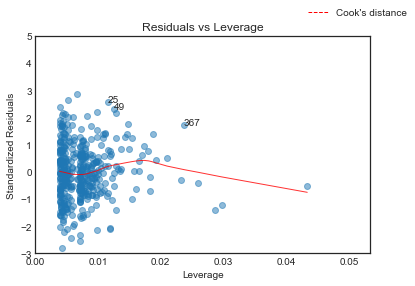

In [150]:
diagnostic_plots.diagnostic_plots(X,y)


Comment: The diagnostic plots above illustrate the fit of our model. The top-left plot shows only subtle discernible pattern suggesting our linear model has achieved a reasonable fit to the data. The distribution of residuals appears normal and there is no heteroscedasticity.

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [151]:
confs = model.conf_int(alpha=.05)
confs.columns = ['min', 'max']
confs

,min,max
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?
No observations exceed the studentised residual thresholds for outliers of +/-3, although a couple come close.

There is one observation that stands out as particularly high leverage in the bottom-right plot above, but this observation is not an outlier.

In [152]:
outs = model.outlier_test()
outs[outs['student_resid'].abs() > 3]

,student_resid,unadj_p,bonf(p)


The leverage statistic hi is always between 1/n and 1, and the average leverage for all the observations is always equal to (p + 1)/n.  

In [153]:
leverage_statistic =  (2+1)/len(carseats_df)

In [154]:
#create instance of influence
influence = model.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag
leverage.mean()

0.007500000000000003

In [155]:
leverage[leverage.argmax()]

0.04333765703717883

O resultado acima é exatamente o esperado

Esse ponto possui um leverage alto

Vamos remove-lo e ver se muda o resultado

In [156]:
carseats_df.drop(inplace=True,index=leverage.argmax())

In [157]:
f = 'Sales ~  Price + US'

y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')
model = smf.ols(formula=f,data=carseats_df).fit()
print(model.mse_resid**(1/2))
model.summary()

2.4716197126380486


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     61.76
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           4.53e-24
Time:                        20:32:51   Log-Likelihood:                -925.70
No. Observations:                 399   AIC:                             1857.
Df Residuals:                     396   BIC:                             1869.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1025      0.646     20.295      0.000      11.833      14.372
US[T.Yes]      1.1917      0.259      4.599      0.000       0.682       1.701
Price         -0.0550      0.005    -10.317      0.000      -0.066      -0.045
==============================================================================
Omnibus:                        0.632   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.720
Skew:                           0.089   Prob(JB):                        0.698
Kurtosis:                       2.891   Cond. No.                         620.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

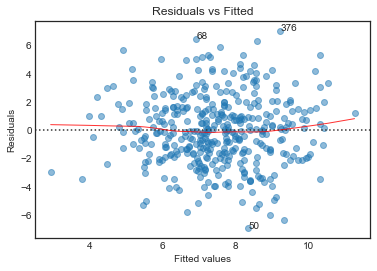

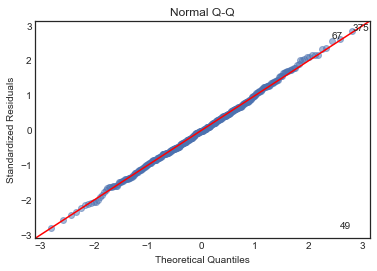

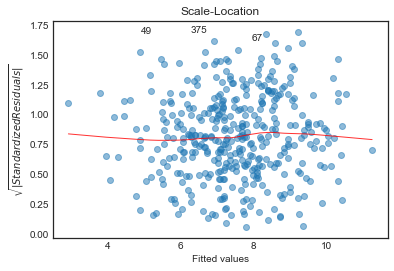

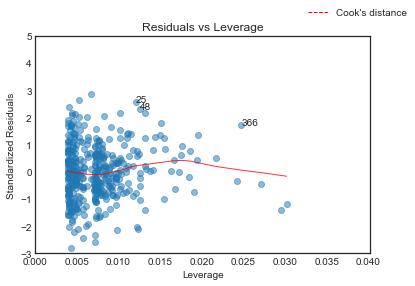

In [158]:
diagnostic_plots.diagnostic_plots(X,y)

Os resultados são melhores

# 11)  In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

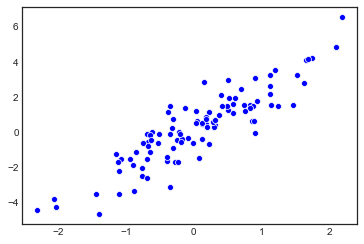

In [159]:
np.random.seed(1)
x  = np.random.normal(size=100)
y  = 2*x + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y}) 
sns.scatterplot(x=x, y=y, color='b');

In [160]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           3.46e-36
Time:                        20:32:52   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of the t-statistic is near zero so the null hypothesis is rejected.

## (b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [161]:
model = sm.OLS(x,y).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           3.46e-36
Time:                        20:32:52   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resultado identico: The p-value of the t-statistic is near zero so the null hypothesis is rejected.

## C What is the relationship between the results obtained in (a) and (b)?

In [162]:
11c.
Both results in (a) and (b) reflect the same line created in 11a. In other words, y=2x+ϵ could also be written x=0.5∗(y−ϵ).

SyntaxError: invalid syntax (<ipython-input-162-d9ec31a256e6>, line 1)

# 14. This problem focuses on the collinearity problem.
### (a) Perform the following commands in R. The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [ ]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.randn(100)/10
y  = 2 + 2*x1 + 0.3*x2 + np.random.randn(100)

### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [ ]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
sns.scatterplot(x='x1', y='x2', data=df);

print('Correlation coefficient: ' + str(np.corrcoef(x1, x2)[0][1]))

### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How  o these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [ ]:
f = 'y ~x1 + x2'
model = smf.ols(formula=f, data=df).fit()
model.summary()

O modelo mostra um B0 estatisticamente significante, um B1 não significante, e o B2 significante caso usemos o limiar 5%.

### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How  o these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [ ]:
f = 'y ~x1'
model = smf.ols(formula=f, data=df).fit()
model.summary()

Agora o b1 é estatísticamente relevante. Podemos rejeitar a hipotese nula.

### (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [ ]:
f = 'y ~ x2'
model = smf.ols(formula=f, data=df).fit()
model.summary()

b2 é estatísticamente relevante. Podemos rejeitar a hipotese nula.

### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

Yes. We get contradictory results for the p-value associated with $β_1$, which in results c woul cause us to accept the null hypothesis and in d) we would reject it.

This contradiction can be explained by the collinearity of x1 and x2 which causes an increased standard error for all $β_j$ when our model incorporates both features, which in turn increases the p-values and causes us to incorrectly accept the null hypothesis $H0 :β_1 =0$ when our model uses both features.

### (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
#### x1=c(x1, 0.1) 
#### x2=c(x2, 0.8)
#### y=c(y,6)
#### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [ ]:
df2 = df.append({'x1': 0.1, 'x2': 0.8, 'y': 6}, ignore_index=True)

# Fit models
f = 'y ~ x1 + x2'
model_c = smf.ols(formula=f, data=df2).fit()
y, X = patsy.dmatrices(f, df2, return_type='dataframe')
model_c.summary()
model_d = smf.ols(formula='y ~ x1', data=df2).fit()
model_e = smf.ols(formula='y ~ x2', data=df2).fit()

In [ ]:
diagnostic_plots.diagnostic_plots(X,y)

model_c : the anomaly is almost an outlier, it is very high leverage

In [ ]:
df2 = df.append({'x1': 0.1, 'x2': 0.8, 'y': 6}, ignore_index=True)

# Fit models
f = 'y ~ x1'
model_d = smf.ols(formula=f, data=df2).fit()
y, X = patsy.dmatrices(f, df2, return_type='dataframe')
model_d.summary()

model_d : the anomaly is an outlier but not particularly high leverage

In [ ]:
diagnostic_plots.diagnostic_plots(X,y)

In [ ]:
df2 = df.append({'x1': 0.1, 'x2': 0.8, 'y': 6}, ignore_index=True)

# Fit models
f = 'y ~ x2'
model_e = smf.ols(formula=f, data=df2).fit()
y, X = patsy.dmatrices(f, df2, return_type='dataframe')
model_e.summary()

model_d : the anomaly is an outlier but not particularly high leverage

In [ ]:
diagnostic_plots.diagnostic_plots(X,y)

model_e : the anomaly is not an outlier but is fairly high leverage

# 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

#### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [ ]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Check for missing values
assert boston_df.isnull().sum().sum() == 0



In [ ]:
boston_df.columns

In [ ]:
boston_df.add()

In [172]:
models_a = [smf.ols(formula='CRIM ~ {}'.format(f), data=boston_df).fit()
            for f in boston_df.columns[1:]]

for model in models_a:
    dp = 4
    display(pd.DataFrame({'coef':    np.around(model.params, dp),
                          'std_err': np.around(model.bse, dp),
                          't':       np.around(model.params / model.bse, dp),
                          'P>|t|':   np.around(model.pvalues, dp),
                          '[0.025':  np.around(model.conf_int(alpha=0.05)[0], dp),
                          '0.975]':  np.around(model.conf_int(alpha=0.05)[1], dp)}))

,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,4.4537,0.4172,10.6747,0.0,3.6340,5.2734
ZN,-0.0739,0.0161,-4.5938,0.0,-0.1056,-0.0423


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.0637,0.6672,-3.0930,0.0021,-3.3746,-0.7529
INDUS,0.5098,0.0510,9.9908,0.0000,0.4095,0.6100


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.7444,0.3961,9.4530,0.0000,2.9662,4.5227
CHAS,-1.8928,1.5061,-1.2567,0.2094,-4.8518,1.0663


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-13.7199,1.6995,-8.073,0.0,-17.0588,-10.3809
NOX,31.2485,2.9992,10.419,0.0,25.3561,37.1410


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,20.4818,3.3645,6.0877,0.0,13.8717,27.0919
RM,-2.6841,0.5320,-5.0448,0.0,-3.7293,-1.6388


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-3.7779,0.9440,-4.0021,0.0001,-5.6325,-1.9233
AGE,0.1078,0.0127,8.4628,0.0000,0.0828,0.1328


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,9.4993,0.7304,13.0056,0.0,8.0643,10.9343
DIS,-1.5509,0.1683,-9.2135,0.0,-1.8816,-1.2202


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.2872,0.4435,-5.1573,0.0,-3.1584,-1.4159
RAD,0.6179,0.0343,17.9982,0.0,0.5505,0.6854


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-8.5284,0.8158,-10.4539,0.0,-10.1312,-6.9256
TAX,0.0297,0.0018,16.0994,0.0,0.0261,0.0334


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-17.6469,3.1473,-5.6071,0.0,-23.8303,-11.4635
PTRATIO,1.1520,0.1694,6.8014,0.0,0.8192,1.4847


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,16.5535,1.4259,11.6092,0.0,13.7521,19.3550
B,-0.0363,0.0039,-9.3670,0.0,-0.0439,-0.0287


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-3.3305,0.6938,-4.8007,0.0,-4.6936,-1.9675
LSTAT,0.5488,0.0478,11.4907,0.0,0.4550,0.6426


### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [177]:
' + '.join(boston_df.columns)

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [180]:
f = 'CRIM ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'
model = smf.ols(formula= f,data=boston_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           4.84e-55
Time:                        20:58:37   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9967      6.979      1.432      0.153      -3.716      23.709
ZN             0.0364      0.019      1.943      0.053      -0.000       0.073
INDUS         -0.0694      0.084     -0.825      0.410      -0.235       0.096
CHAS          -1.3117      1.179     -1.112      0.267      -3.629       1.005
NOX           -6.9288      5.225     -1.326      0.185     -17.195       3.338
RM            -0.3348      0.573     -0.585      0.559      -1.460       0.790
AGE            0.0013      0.018      0.074      0.941      -0.034       0.037
DIS           -0.7089      0.271     -2.612      0.009      -1.242      -0.176
RAD            0.5389      0.088      6.151      0.000       0.367       0.711
TAX           -0.0014      0.005     -0.263      0.793      -0.011       0.009
PTRATIO       -0.0834      0.179     -0.465      0.642      -0.436       0.269
B             -0.0096      0.004     -2.625      0.009      -0.017      -0.002
LSTAT          0.2356      0.069      3.431      0.001       0.101       0.371
==============================================================================
Omnibus:                      685.174   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97204.794
Skew:                           6.921   Prob(JB):                         0.00
Kurtosis:                      69.475   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
model.pvalues[model.pvalues < 0.05]

DIS      9.287402e-03
RAD      1.597550e-09
B        8.931725e-03
LSTAT    6.524119e-04
dtype: float64

### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

,Univariate_coef,Multivariate_coef
ZN,-0.073935,0.036405
INDUS,0.509776,-0.069435
CHAS,-1.892777,-1.311667
NOX,31.248531,-6.928836
RM,-2.684051,-0.334794
AGE,0.107786,0.001343
DIS,-1.550902,-0.708934
RAD,0.617911,0.538916
TAX,0.029742,-0.001356
PTRATIO,1.151983,-0.083383


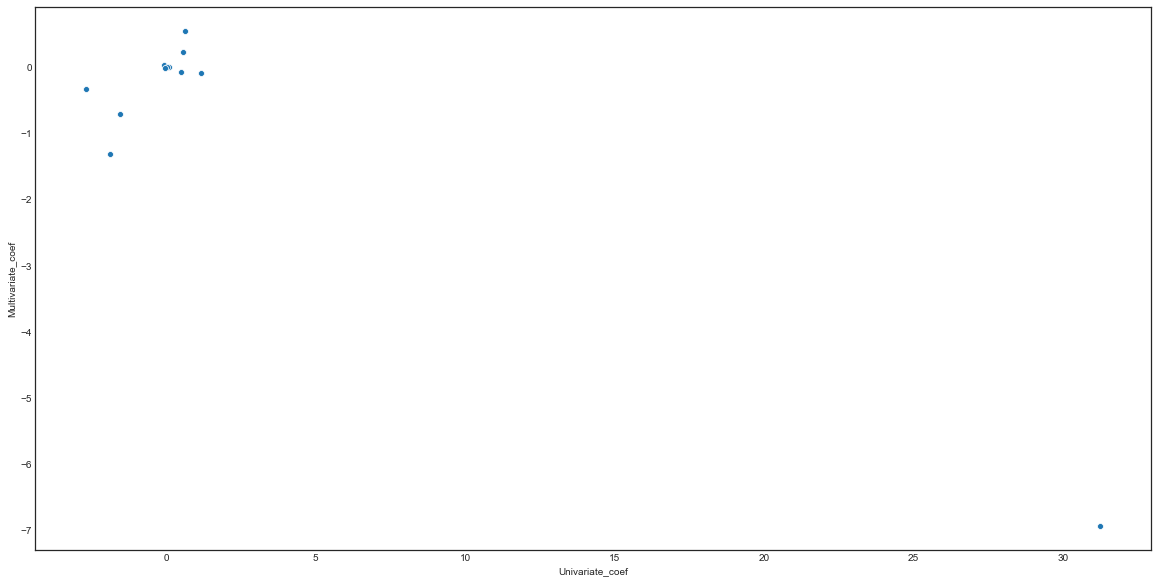

In [187]:
# Get coefficients
univariate_params = pd.concat([m.params[1:] for m in models_a])
multivariate_params = model.params[1:]
df = pd.DataFrame({'Univariate_coef': univariate_params, 
                   'Multivariate_coef': multivariate_params,})
display(df)

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x='Univariate_coef', y='Multivariate_coef', data=df);

### d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form


In [189]:
models_a = [smf.ols(formula='CRIM ~ {0} + np.power({0},2) + np.power({0},3)'.format(f), data=boston_df).fit()
            for f in boston_df.columns[1:]]

for model in models_a:
    dp = 4
    display(pd.DataFrame({'coef':    np.around(model.params, dp),
                          'std_err': np.around(model.bse, dp),
                          't':       np.around(model.params / model.bse, dp),
                          'P>|t|':   np.around(model.pvalues, dp),
                          '[0.025':  np.around(model.conf_int(alpha=0.05)[0], dp),
                          '0.975]':  np.around(model.conf_int(alpha=0.05)[1], dp)}))

,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,4.8461,0.4330,11.1922,0.0000,3.9954,5.6967
ZN,-0.3322,0.1098,-3.0252,0.0026,-0.5479,-0.1164
"np.power(ZN, 2)",0.0065,0.0039,1.6791,0.0938,-0.0011,0.0141
"np.power(ZN, 3)",-0.0000,0.0000,-1.2030,0.2295,-0.0001,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.6626,1.5740,2.3269,0.0204,0.5702,6.7550
INDUS,-1.9652,0.4820,-4.0773,0.0001,-2.9122,-1.0182
"np.power(INDUS, 2)",0.2519,0.0393,6.4070,0.0000,0.1747,0.3292
"np.power(INDUS, 3)",-0.0070,0.0010,-7.2920,0.0000,-0.0089,-0.0051


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,3.7444,0.3961,9.4530,0.0000,2.9662,4.5227
CHAS,-0.6309,0.5020,-1.2567,0.2094,-1.6173,0.3554
"np.power(CHAS, 2)",-0.6309,0.5020,-1.2567,0.2094,-1.6173,0.3554
"np.power(CHAS, 3)",-0.6309,0.5020,-1.2567,0.2094,-1.6173,0.3554


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,233.0866,33.6431,6.9282,0.0,166.9880,299.1852
NOX,-1279.3713,170.3975,-7.5082,0.0,-1614.1513,-944.5912
"np.power(NOX, 2)",2248.5441,279.8993,8.0334,0.0,1698.6257,2798.4624
"np.power(NOX, 3)",-1245.7029,149.2816,-8.3446,0.0,-1538.9966,-952.4091


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,112.6246,64.5172,1.7457,0.0815,-14.1325,239.3817
RM,-39.1501,31.3115,-1.2503,0.2118,-100.6679,22.3676
"np.power(RM, 2)",4.5509,5.0099,0.9084,0.3641,-5.2920,14.3938
"np.power(RM, 3)",-0.1745,0.2637,-0.6615,0.5086,-0.6927,0.3437


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-2.5488,2.7691,-0.9204,0.3578,-7.9893,2.8918
AGE,0.2737,0.1864,1.4683,0.1427,-0.0925,0.6398
"np.power(AGE, 2)",-0.0072,0.0036,-1.9878,0.0474,-0.0144,-0.0001
"np.power(AGE, 3)",0.0001,0.0000,2.7237,0.0067,0.0000,0.0001


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,30.0476,2.4459,12.2850,0.0,25.2422,34.8530
DIS,-15.5544,1.7360,-8.9600,0.0,-18.9650,-12.1437
"np.power(DIS, 2)",2.4521,0.3464,7.0783,0.0,1.7715,3.1327
"np.power(DIS, 3)",-0.1186,0.0204,-5.8135,0.0,-0.1587,-0.0785


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,-0.6055,2.0501,-0.2954,0.7678,-4.6334,3.4223
RAD,0.5127,1.0436,0.4913,0.6234,-1.5376,2.5631
"np.power(RAD, 2)",-0.0752,0.1485,-0.5061,0.6130,-0.3670,0.2167
"np.power(RAD, 3)",0.0032,0.0046,0.7031,0.4823,-0.0058,0.0122


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,19.1836,11.7955,1.6263,0.1045,-3.9911,42.3583
TAX,-0.1533,0.0957,-1.6023,0.1097,-0.3413,0.0347
"np.power(TAX, 2)",0.0004,0.0002,1.4877,0.1375,-0.0001,0.0008
"np.power(TAX, 3)",-0.0000,0.0000,-1.1668,0.2439,-0.0000,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,477.1840,156.7950,3.0434,0.0025,169.1288,785.2393
PTRATIO,-82.3605,27.6439,-2.9793,0.0030,-136.6726,-28.0485
"np.power(PTRATIO, 2)",4.6353,1.6083,2.8821,0.0041,1.4755,7.7952
"np.power(PTRATIO, 3)",-0.0848,0.0309,-2.7433,0.0063,-0.1455,-0.0241


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,18.2637,2.3049,7.9238,0.0000,13.7353,22.7921
B,-0.0836,0.0563,-1.4834,0.1386,-0.1942,0.0271
"np.power(B, 2)",0.0002,0.0003,0.7162,0.4742,-0.0004,0.0008
"np.power(B, 3)",-0.0000,0.0000,-0.6078,0.5436,-0.0000,0.0000


,coef,std_err,t,P>|t|,[0.025,0.975]
Intercept,1.2010,2.0286,0.5920,0.5541,-2.7847,5.1866
LSTAT,-0.4491,0.4649,-0.9660,0.3345,-1.3624,0.4643
"np.power(LSTAT, 2)",0.0558,0.0301,1.8522,0.0646,-0.0034,0.1149
"np.power(LSTAT, 3)",-0.0009,0.0006,-1.5170,0.1299,-0.0020,0.0003


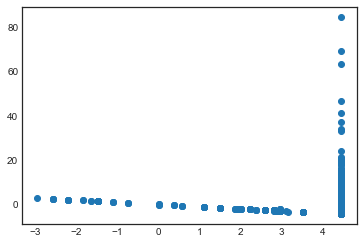

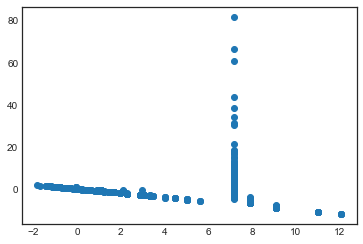

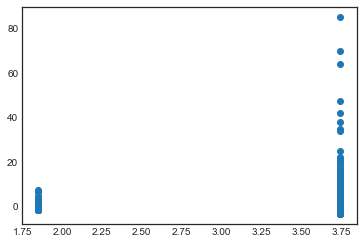

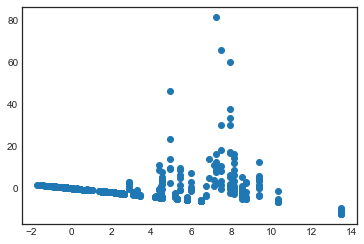

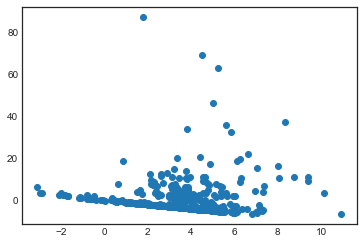

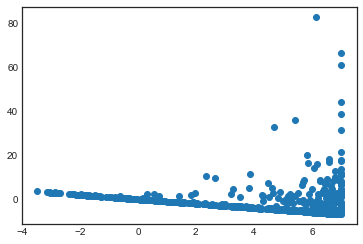

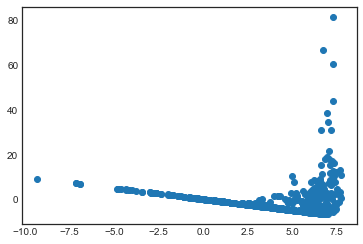

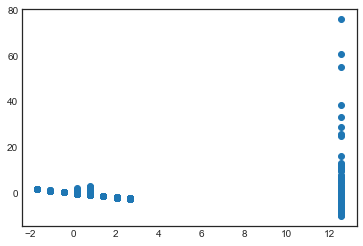

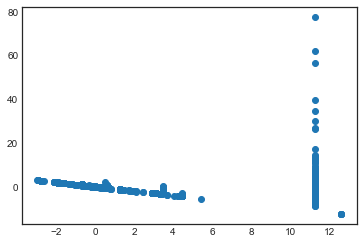

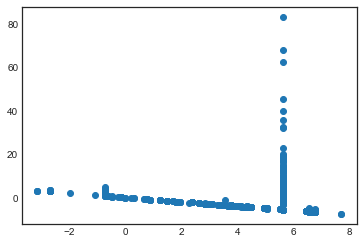

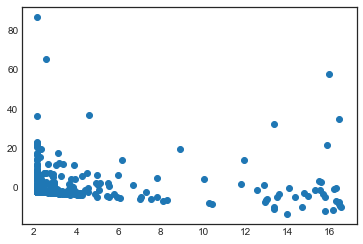

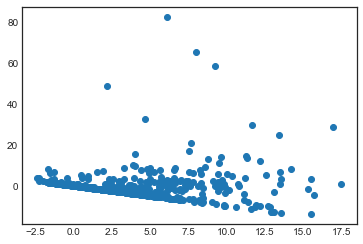

In [196]:
models_a = [smf.ols(formula='CRIM ~ {}'.format(f), data=boston_df).fit()
            for f in boston_df.columns[1:]]

for model in models_a:
    residuals = boston_df.CRIM - model.predict()
    
    plt.subplots()
    plt.scatter(x=model.predict(),y=residuals)

In [197]:
residuals

0       0.603810
1      -1.658228
2       1.146145
3       1.749422
4       0.474459
5       0.501115
6      -3.402815
7      -7.034524
8     -12.883949
9      -5.883984
10     -7.667630
11     -3.834631
12     -5.197405
13     -0.572829
14     -1.662239
15     -0.690448
16      0.773333
17     -3.936228
18     -2.282280
19     -2.134180
20     -6.953548
21     -3.407392
22     -5.710617
23     -6.591271
24     -4.864720
25     -4.889689
26     -4.125351
27     -5.197039
28     -2.921173
29     -2.241693
         ...    
476    -2.049725
477     4.683211
478     3.668588
479    10.469407
480     3.260385
481     4.790969
482     5.214577
483     0.430372
484    -1.611948
485     1.197853
486     0.801192
487     1.882393
488    -6.430016
489    -9.640943
490   -12.750528
491    -6.480624
492    -3.884686
493    -3.087297
494    -3.848149
495    -6.149436
496    -7.981595
497    -4.139229
498    -3.520900
499    -4.778584
500    -4.309454
501    -1.913774
502    -1.607339
503     0.2960